### Customer Segmentation
#### 0. Packages and datasets setup
#### 1. Data Inspection
#### 2. Handle Missing Values
#### 3. Handle Skewness of Data
#### 4. Feature Engineering
#### 5. Check Correlation Between Features
#### 6. Reduce Dimension (PCA)
#### 6. Segmentation Models
- **K-Means**: Fast and widely used, good for well-separated clusters.
- **DBSCAN**: Great for detecting clusters of varying shapes and handling noise.
- **Gaussian Mixture Models (GMM)**: Probabilistic clustering, good when clusters have overlapping distributions.
- **Hierarchical Clustering**: Creates a dendrogram, useful when the number of clusters is unknown.
- **Spectral Clustering**: Uses graph-based techniques, useful for complex cluster structures.
#### 7. Evaluation Metrics
- **Silhouette Score**
- **Davies-Bouldin Index (DBI)**
- **Calinski-Harabasz Index**
- **Elbow Method**
- **Gap Statistic**
- **Cluster Distribution Check**
- **Principal Component Analysis (PCA) for Visualization**
- **t-SNE for Visualization**


## 0. Packages and Datasets Setup

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
# For transformations
from scipy.stats import skew, boxcox, yeojohnson
from datetime import datetime
import os

In [213]:
df = pd.read_csv('../Data/marketing_campaign.csv', sep=";")


## 1. Data Inspection

In [214]:
df.head(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,2013-09-09,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,2012-11-13,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,2013-05-08,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,2013-06-06,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,2014-03-13,68,28,...,20,1,0,0,0,0,0,3,11,0


In [215]:
num_rows, num_cols = df.shape
print('df has {} rows and {} columns'.format(num_rows, num_cols))

df has 2240 rows and 29 columns


In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [217]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


## 2. Missing Value Handling

In [218]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = missing_percentage[missing_percentage > 0]
print(missing_data)



Income    1.071429
dtype: float64


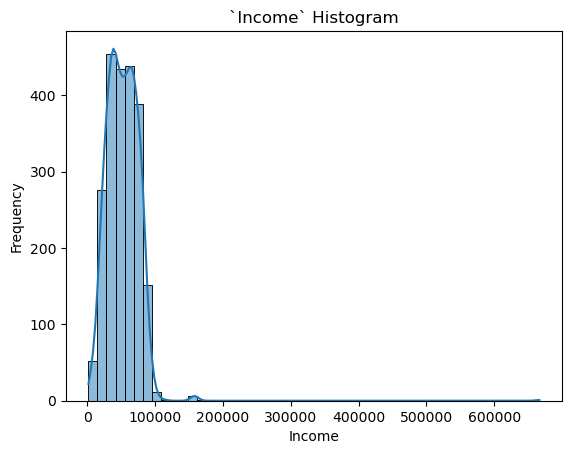

In [219]:
sns.histplot(df['Income'], bins=50, kde=True)
plt.title('`Income` Histogram')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

In [220]:
median_value = df['Income'].median()
df['Income'].fillna(median_value, inplace=True)

In [221]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## 3. Feature Engineering

In [222]:
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = df.select_dtypes(include=['object']).columns.tolist()

# Print categorized features
print("Numerical Features:", numerical_features)
print("Categorical Features:", categorical_features)


Numerical Features: ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
Categorical Features: ['Education', 'Marital_Status', 'Dt_Customer']


In [223]:
df['Total_Spending'] = df[['MntWines', 'MntFruits', 'MntMeatProducts', 
                           'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)
df['Total_Purchases'] = df[['NumDealsPurchases', 'NumWebPurchases', 
                            'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)
df['Wine_Spending_Ratio'] = df['MntWines'] / df['Total_Spending']
df['Fruits_Spending_Ratio'] = df['MntFruits'] / df['Total_Spending']
df['Meat_Spending_Ratio'] = df['MntMeatProducts'] / df['Total_Spending']
df['Fish_Spending_Ratio'] = df['MntFishProducts'] / df['Total_Spending']
df['Gold_Spending_Ratio'] = df['MntGoldProds'] / df['Total_Spending']
df['Sweet_Spending_Ratio'] = df['MntSweetProducts'] / df['Total_Spending']
df['Total_Children'] = df['Kidhome'] + df['Teenhome']



In [224]:
df = pd.get_dummies(df, columns=['Education', 'Marital_Status'], drop_first=True)



In [225]:
df['Campaign_Response_Score'] = df[['AcceptedCmp3', 'AcceptedCmp4', 
                                    'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2']].sum(axis=1)

df['Age'] = datetime.today().year - df['Year_Birth']


In [226]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce')
df['Days_Since_Enrolled'] = (datetime.today() - df['Dt_Customer']).dt.days



In [227]:
df.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Total_Spending',
       'Total_Purchases', 'Wine_Spending_Ratio', 'Fruits_Spending_Ratio',
       'Meat_Spending_Ratio', 'Fish_Spending_Ratio', 'Gold_Spending_Ratio',
       'Sweet_Spending_Ratio', 'Total_Children', 'Education_Basic',
       'Education_Graduation', 'Education_Master', 'Education_PhD',
       'Marital_Status_Alone', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Together', 'Marital_Status_Widow',
       'Marital_Status_YOLO', 'Campaign_Response_Score',

## 4. Feature Selection/Dimension Reduction

         Feature 1            Feature 2  Correlation
0   Total_Spending             MntWines     0.891839
1   Total_Spending      MntMeatProducts     0.842965
2   Total_Spending  NumCatalogPurchases     0.778577
3  Total_Purchases      NumWebPurchases     0.777831
4  Total_Purchases    NumStorePurchases     0.820259
5  Total_Purchases       Total_Spending     0.753903
6              Age           Year_Birth    -1.000000


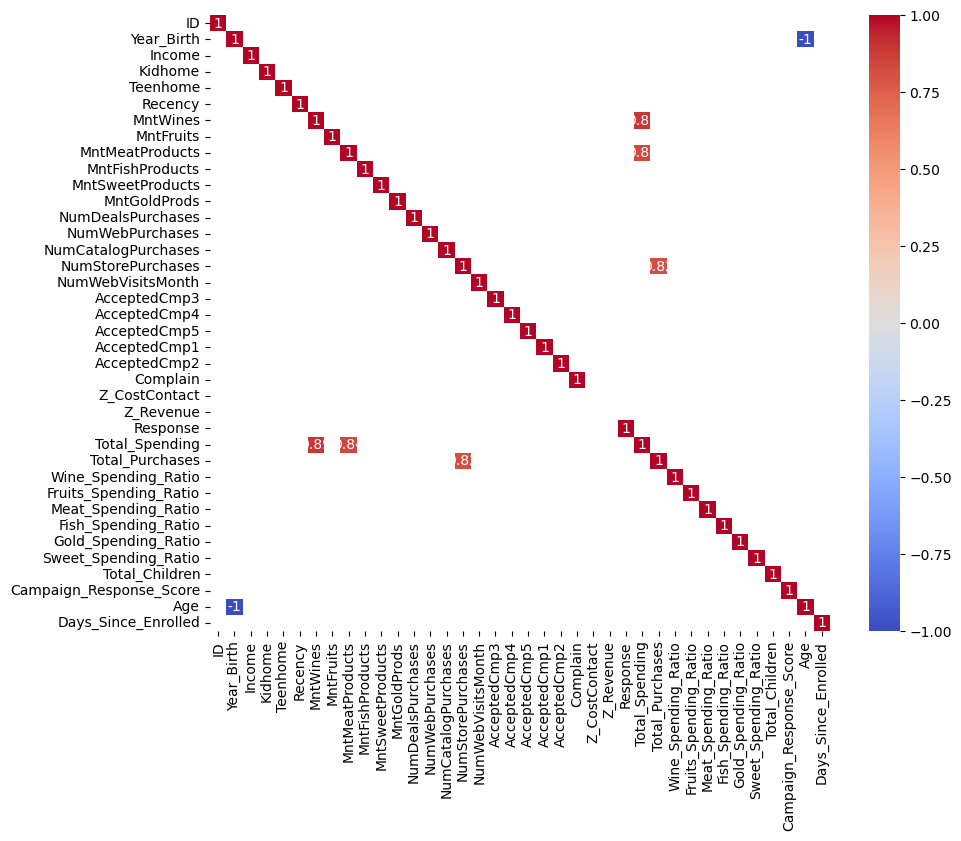

In [228]:
df_numerical = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
corr_matrix = df_numerical.corr()

# Set a threshold for correlation
threshold = 0.75

# Create a mask for correlations above the threshold
high_corr = corr_matrix.abs() > threshold

# Get pairs of highly correlated features
pairs = []
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if high_corr.iloc[i, j]:
            pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Create a DataFrame to display the highly correlated pairs
high_corr_df = pd.DataFrame(pairs, columns=['Feature 1', 'Feature 2', 'Correlation'])

# Print the highly correlated pairs
print(high_corr_df)

# Visualize the correlation matrix (optional)
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [229]:
df = df.drop('Year_Birth', axis=1)


In [230]:
df

,ID,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO,Campaign_Response_Score,Age,Days_Since_Enrolled
0,5524,58138.0,0,0,2012-09-04,58,635,88,546,172,...,False,False,False,True,False,False,False,0,68,4572
1,2174,46344.0,1,1,2014-03-08,38,11,1,6,2,...,False,False,False,True,False,False,False,0,71,4022
2,4141,71613.0,0,0,2013-08-21,26,426,49,127,111,...,False,False,False,False,True,False,False,0,60,4221
3,6182,26646.0,1,0,2014-02-10,26,11,4,20,10,...,False,False,False,False,True,False,False,0,41,4048
4,5324,58293.0,1,0,2014-01-19,94,173,43,118,46,...,False,False,True,False,False,False,False,0,44,4070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,61223.0,0,1,2013-06-13,46,709,43,182,42,...,False,False,True,False,False,False,False,0,58,4290
2236,4001,64014.0,2,1,2014-06-10,56,406,0,30,0,...,False,False,False,False,True,False,False,1,79,3928
2237,7270,56981.0,0,0,2014-01-25,91,908,48,217,32,...,False,True,False,False,False,False,False,1,44,4064
2238,8235,69245.0,0,1,2014-01-24,8,428,30,214,80,...,False,False,False,False,True,False,False,0,69,4065


## 5. Skewness Check

In [231]:
# Drop non-numeric columns if you only want to focus on numeric features
non_numeric_cols = df.select_dtypes(exclude=['float64', 'int64']).columns
df_numeric = df.drop(columns=non_numeric_cols)

# List of numeric columns
numeric_cols = df_numeric.columns

=== Boxplots ===


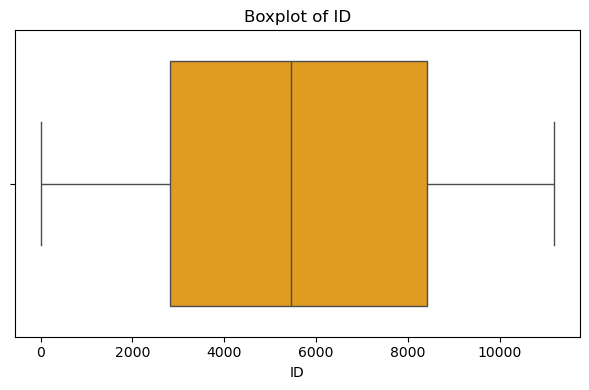

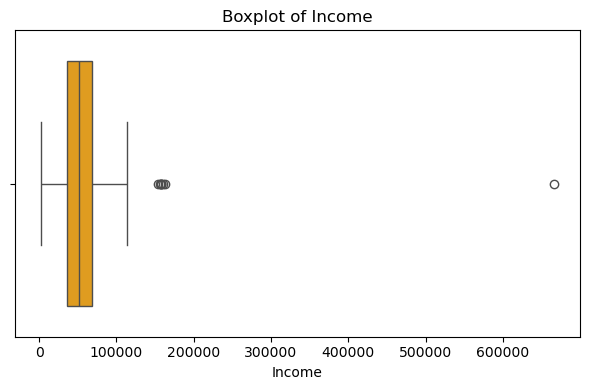

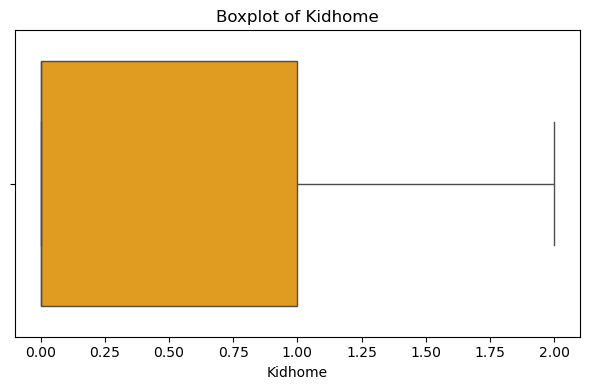

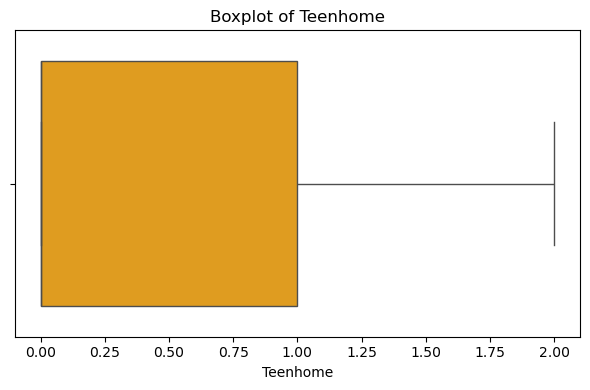

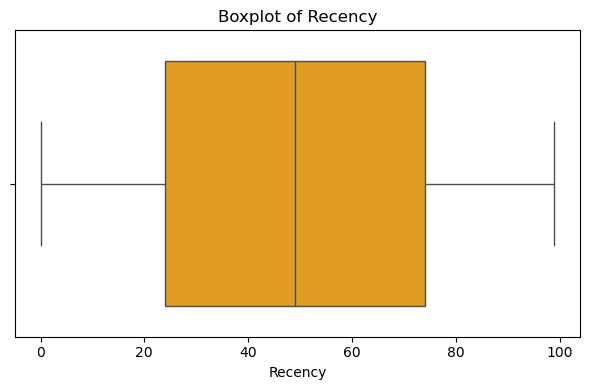

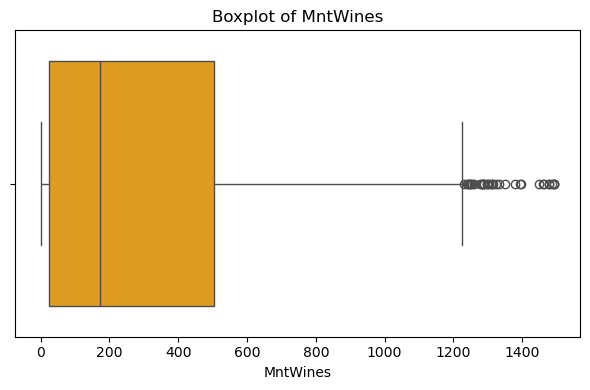

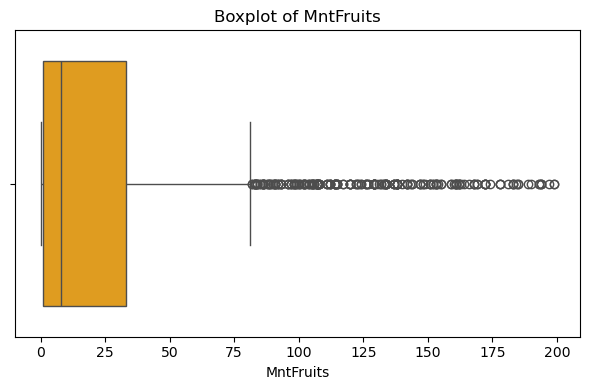

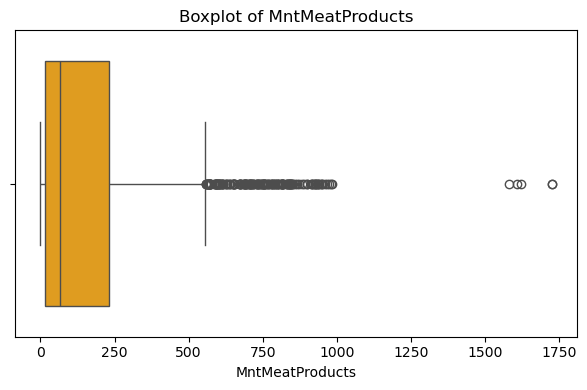

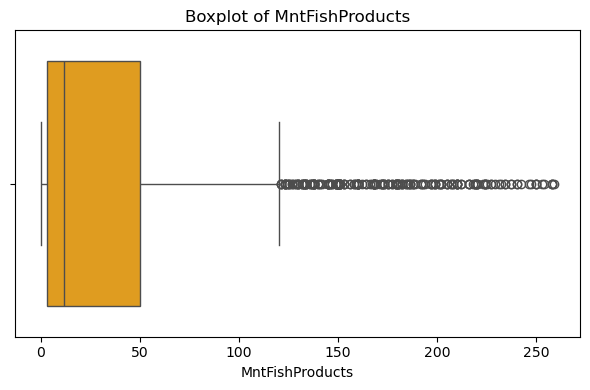

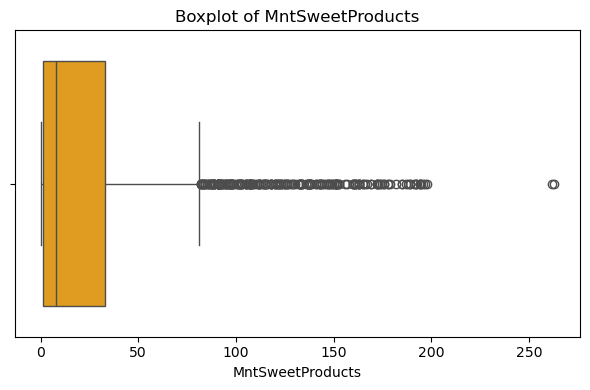

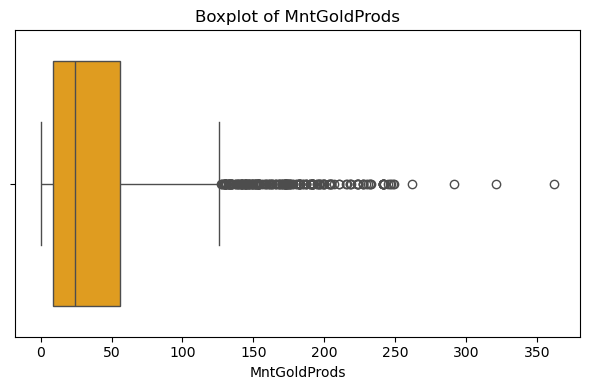

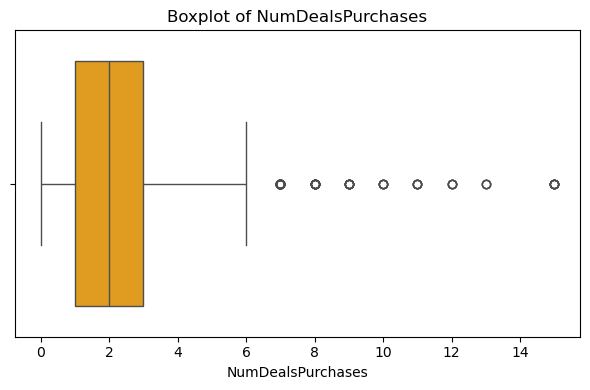

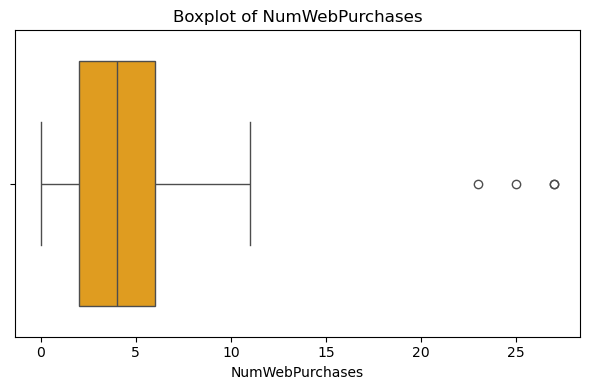

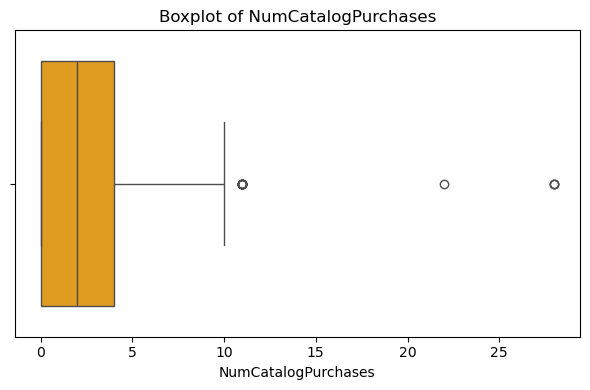

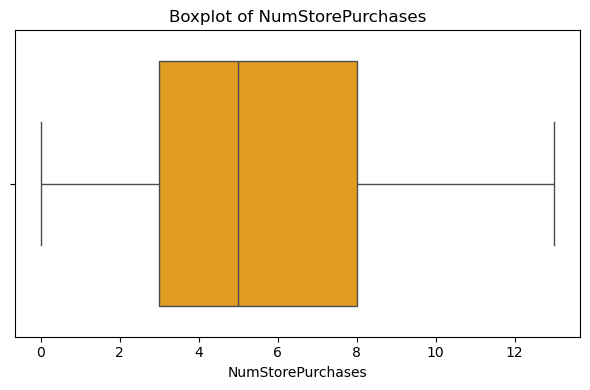

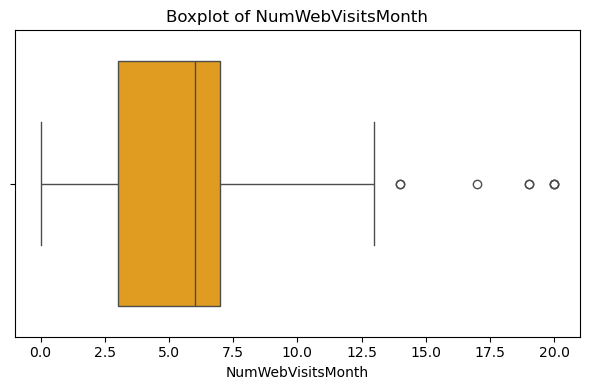

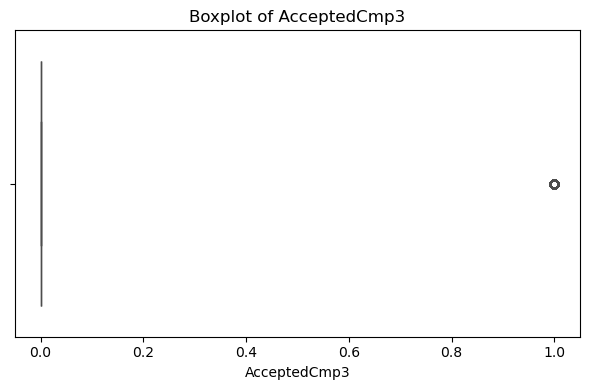

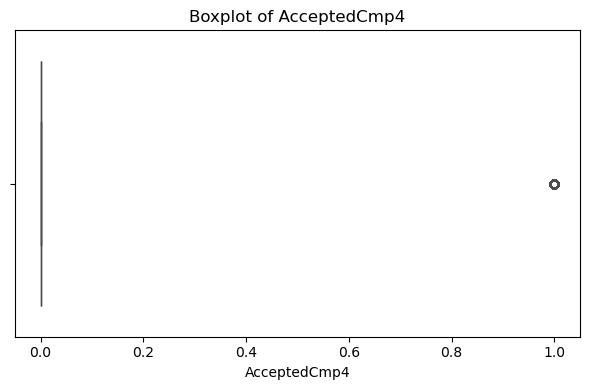

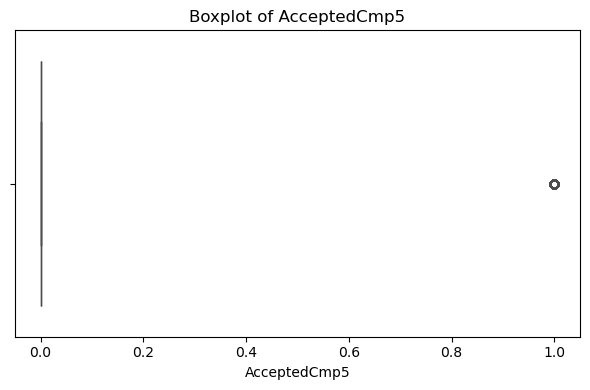

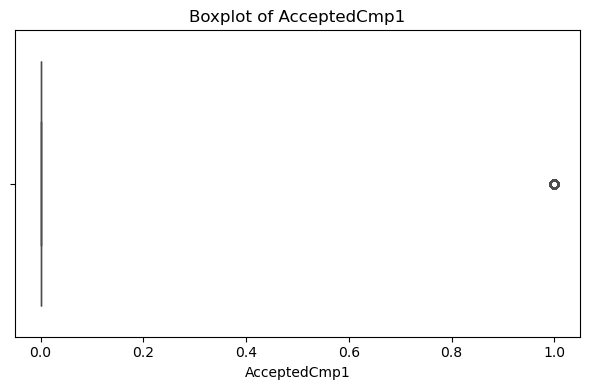

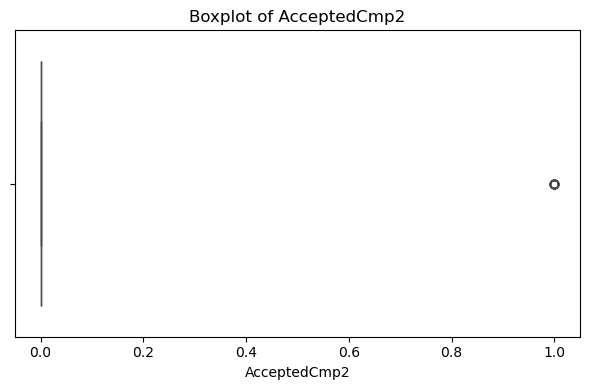

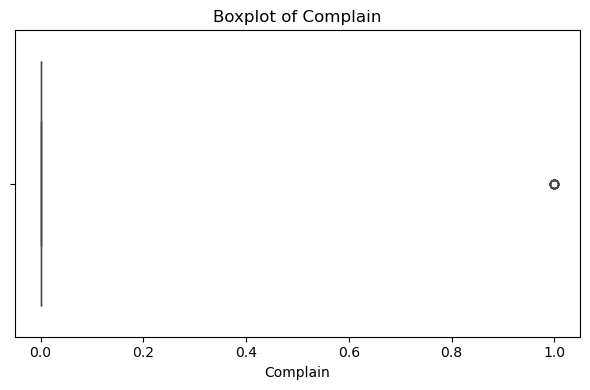

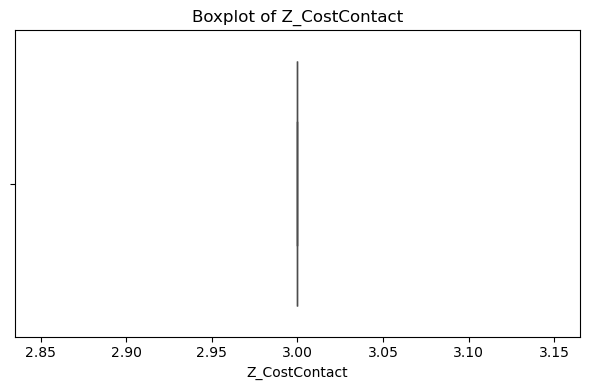

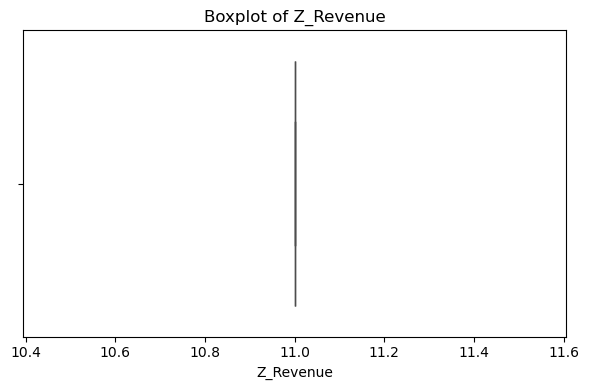

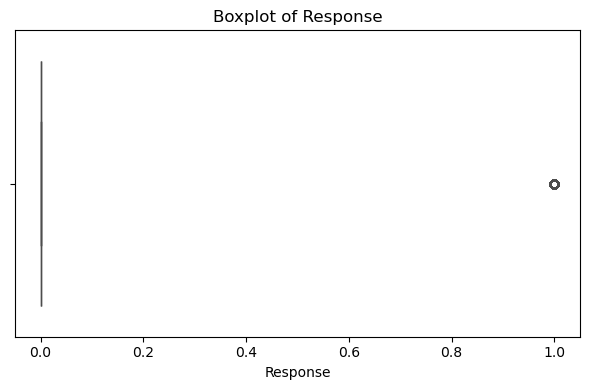

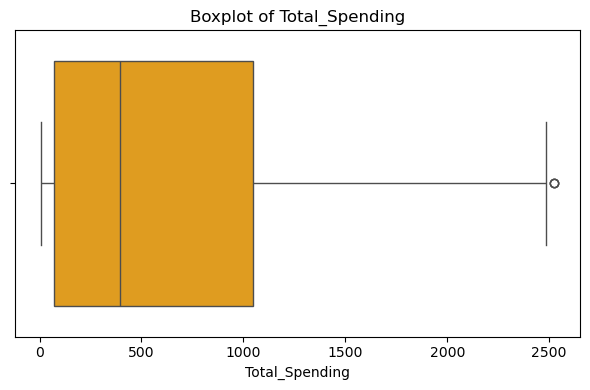

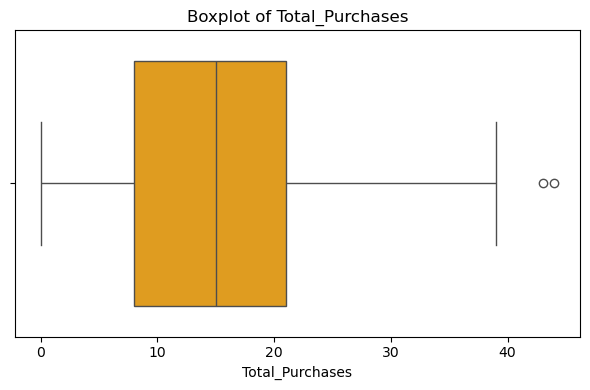

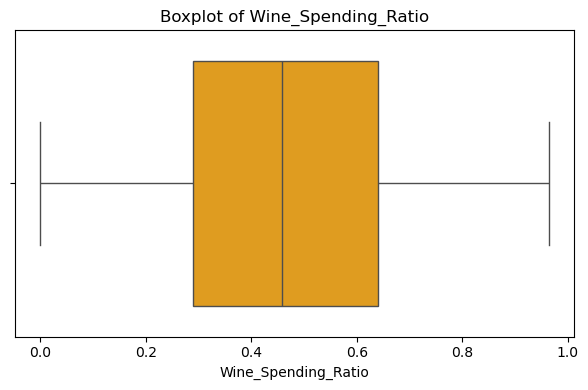

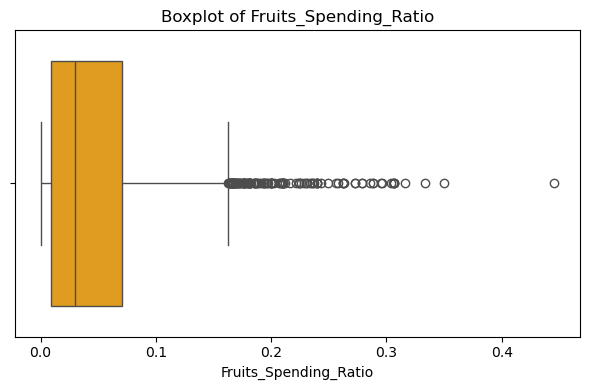

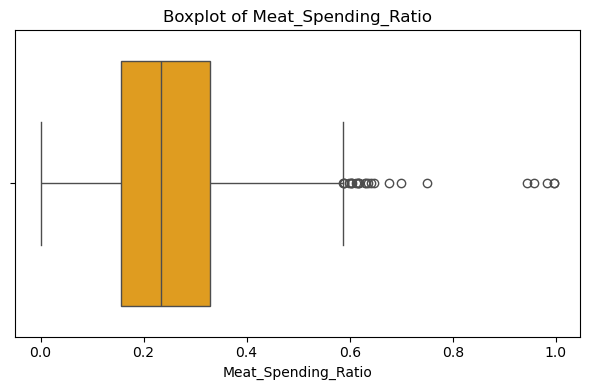

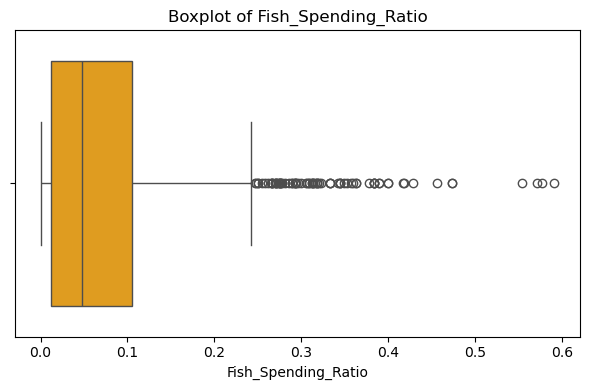

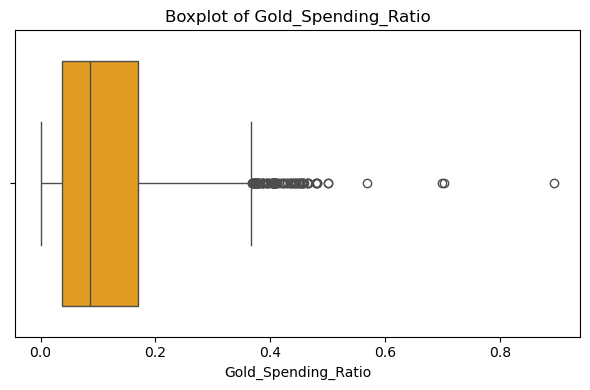

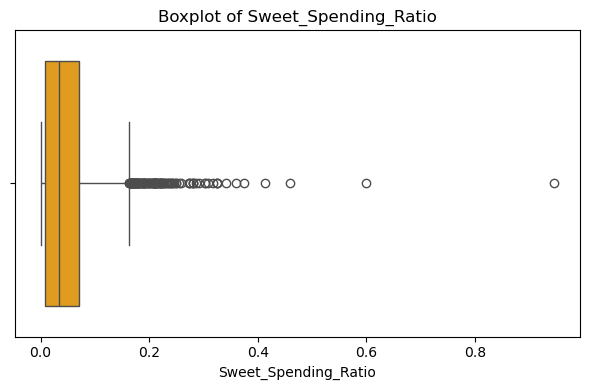

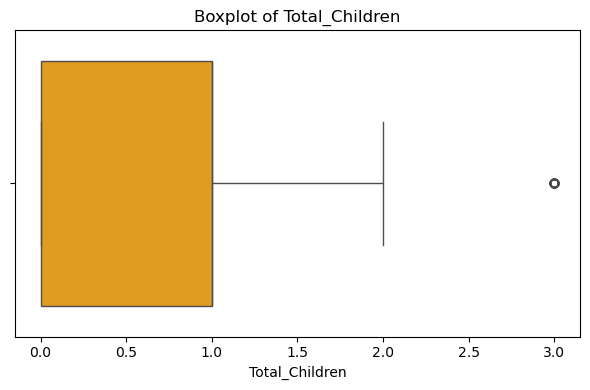

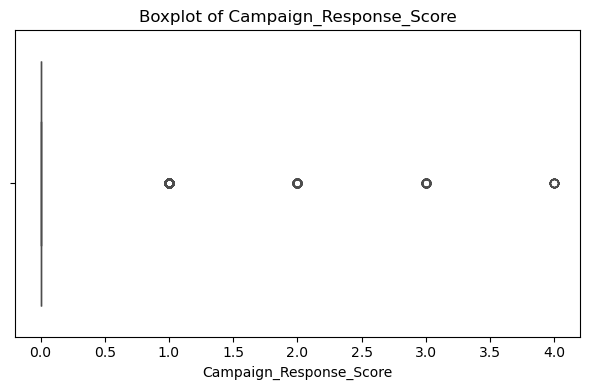

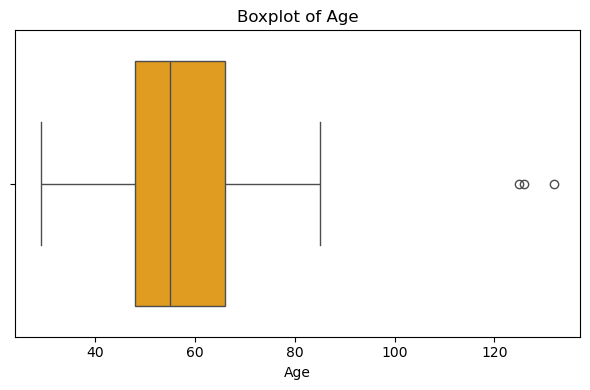

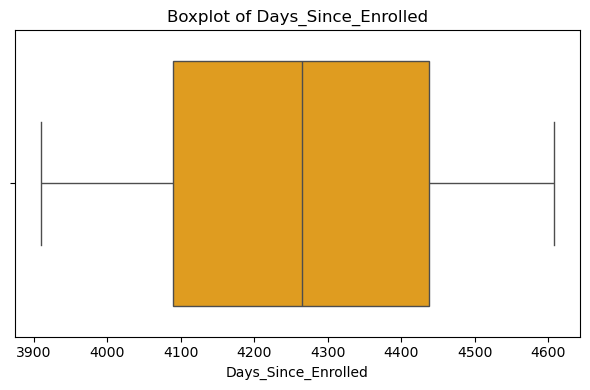

In [232]:
# Boxplots
print("=== Boxplots ===")
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df_numeric[col], color='orange')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [12]:
not_skewed = ['purchases_frequency', 'purchases_installments_frequency', 'credit_limit']

In [13]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
skewness_values = df[numeric_cols].apply(lambda x: skew(x.dropna()))
print("Skewness values:")
print(skewness_values)

Skewness values:
BALANCE                              2.392869
BALANCE_FREQUENCY                   -2.023854
PURCHASES                            8.142604
ONEOFF_PURCHASES                    10.042938
INSTALLMENTS_PURCHASES               7.297600
CASH_ADVANCE                         5.165457
PURCHASES_FREQUENCY                  0.059960
ONEOFF_PURCHASES_FREQUENCY           1.535196
PURCHASES_INSTALLMENTS_FREQUENCY     0.508938
CASH_ADVANCE_FREQUENCY               1.828338
CASH_ADVANCE_TRX                     5.720017
PURCHASES_TRX                        4.629717
CREDIT_LIMIT                         1.522209
PAYMENTS                             5.906475
MINIMUM_PAYMENTS                    13.805520
PRC_FULL_PAYMENT                     1.942316
TENURE                              -2.944294
ONEOFF_PURCHASE_RATIO                0.462193
INSTALLMENT_PURCHASE_RATIO           0.479633
ADVANCE_RATIO                        0.463567
PAYMENT_GAP                         -1.232374
PAYMENT_RATIO    

In [233]:
for col in numeric_cols:
    if abs(skewness_values[col]) > 1:
        # Ensure data is positive by shifting up if needed
        min_val = df[col].min()
        if min_val <= 0:
            shift = abs(min_val) + 1e-5
            df[col] = df[col] + shift

        # Apply log1p transform
        df[col] = np.log1p(df[col])

# 5. Check skewness again after transformation
skewness_after = df[numeric_cols].apply(lambda x: skew(x.dropna()))
print("\nSkewness AFTER transformation (only columns with |skewness|>1 changed):")
print(skewness_after)

NameError: name 'skewness_values' is not defined

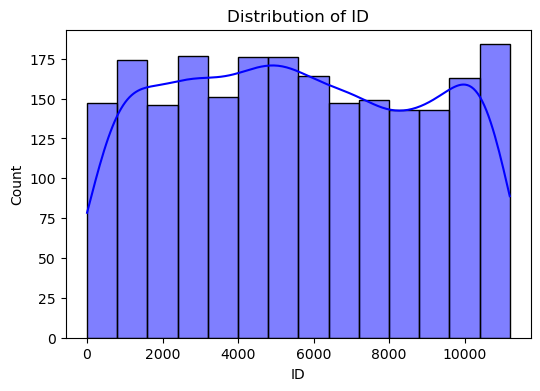

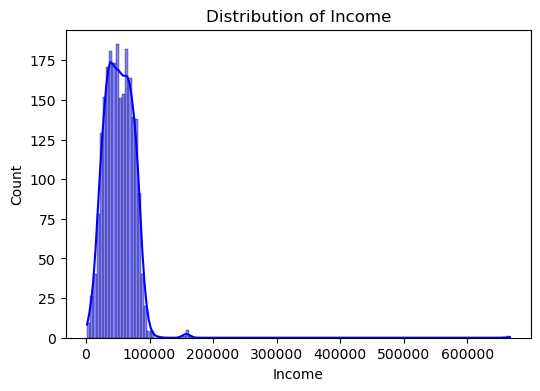

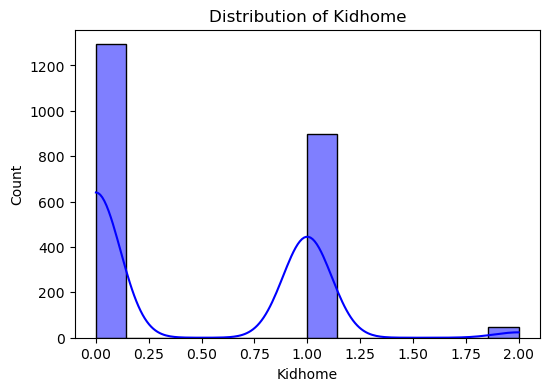

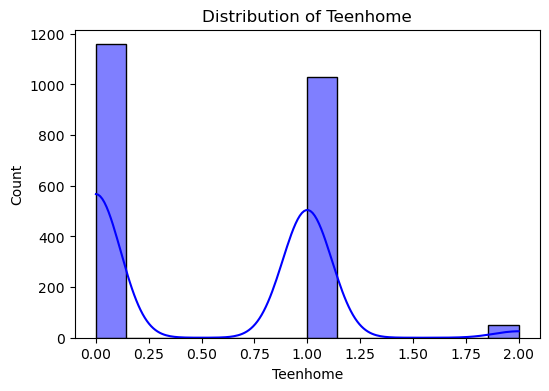

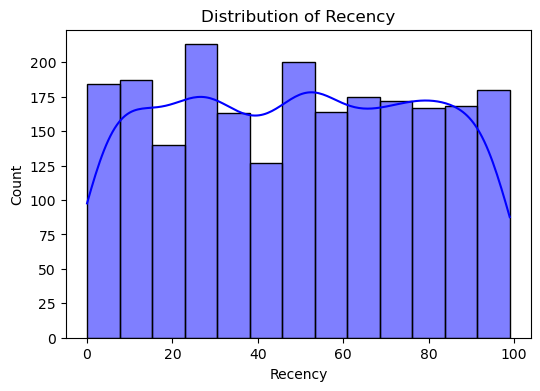

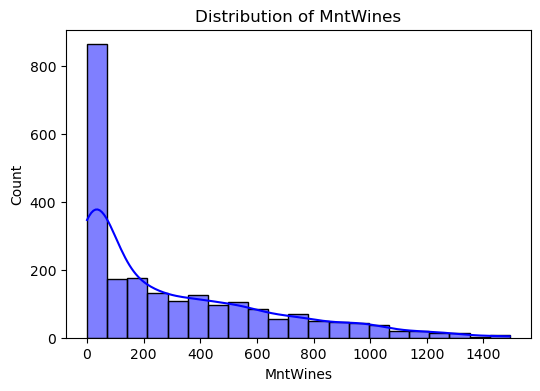

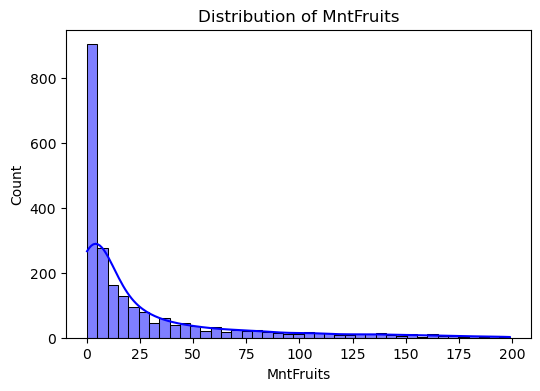

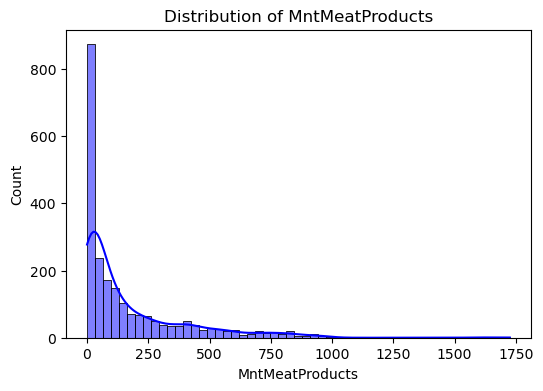

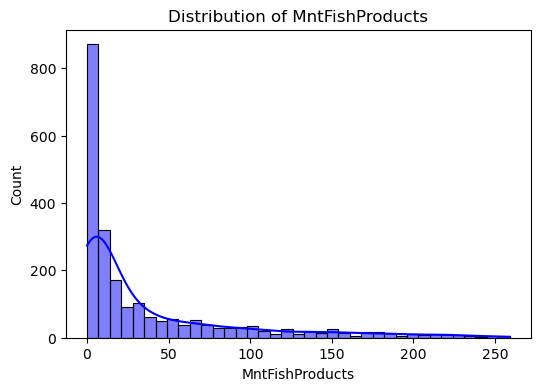

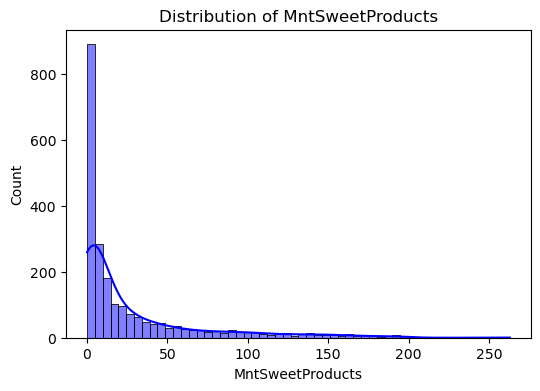

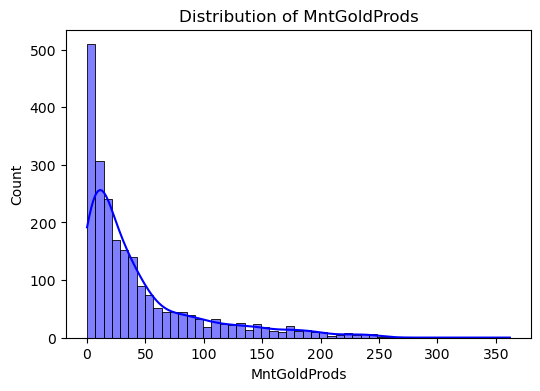

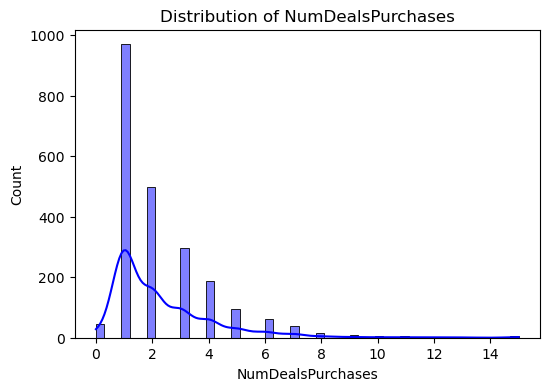

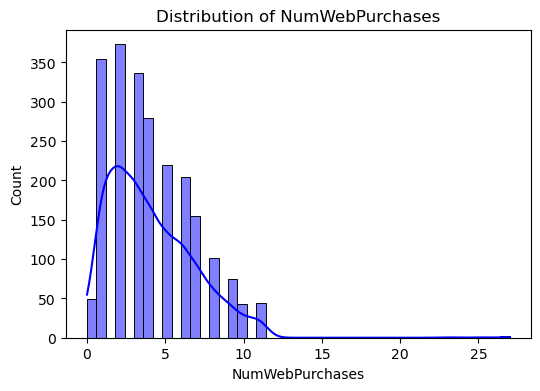

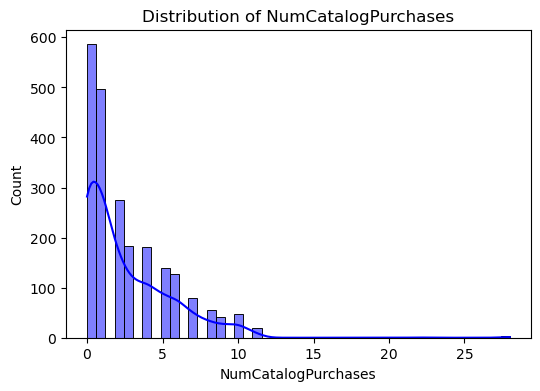

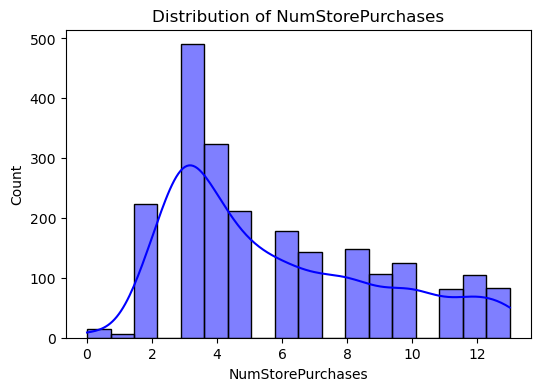

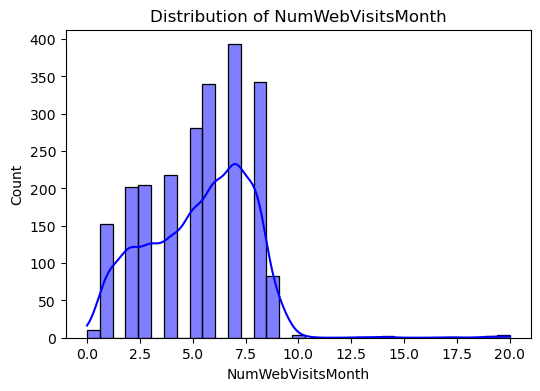

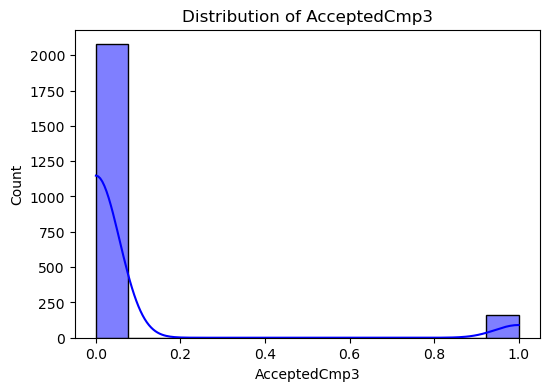

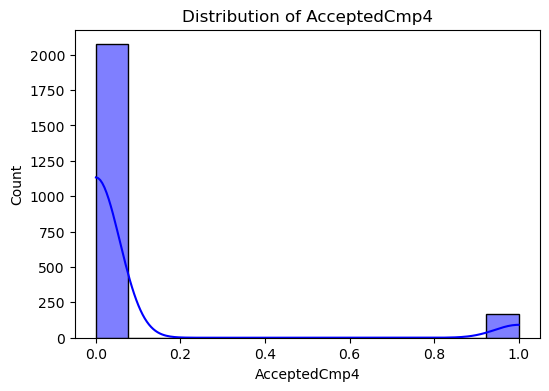

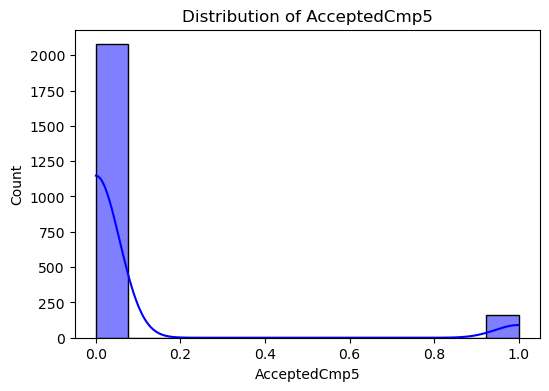

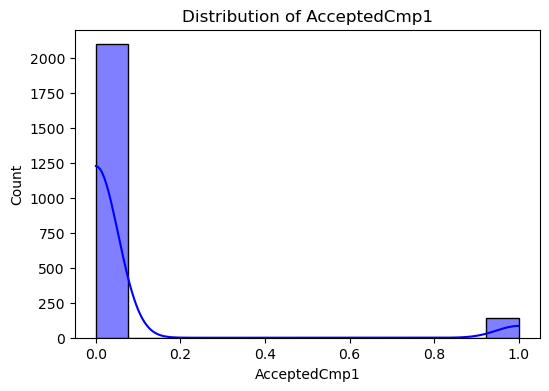

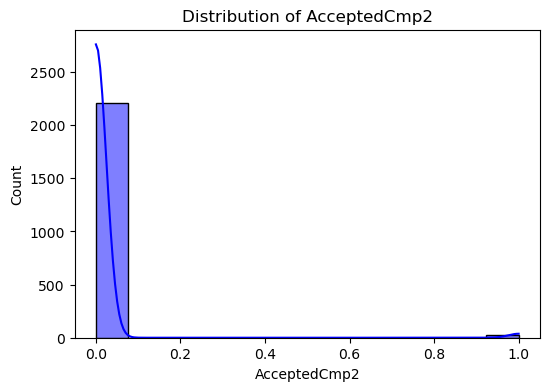

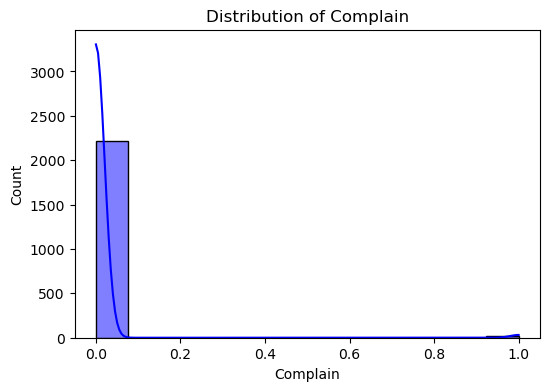

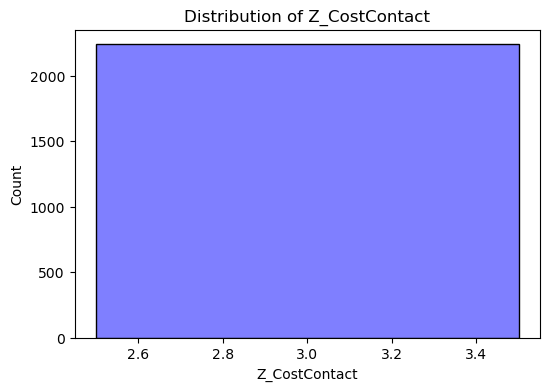

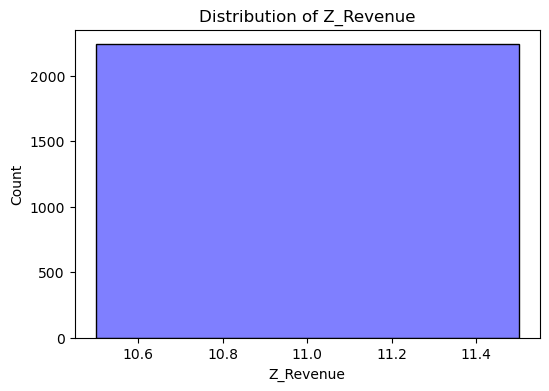

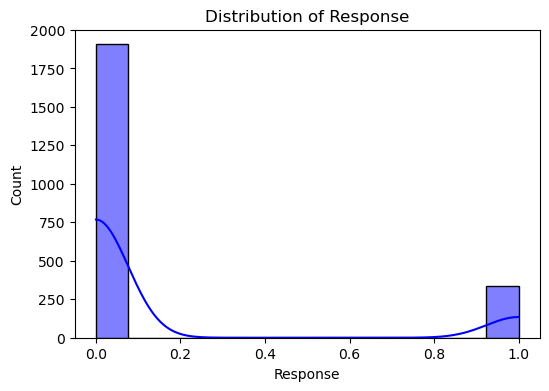

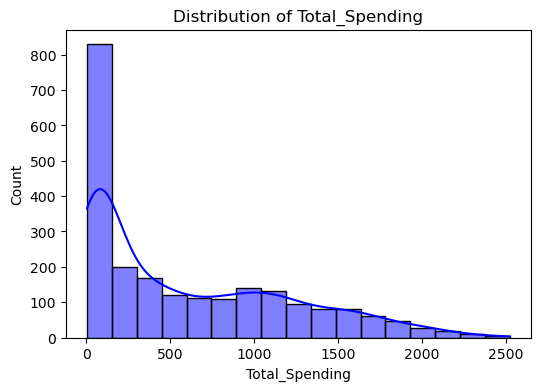

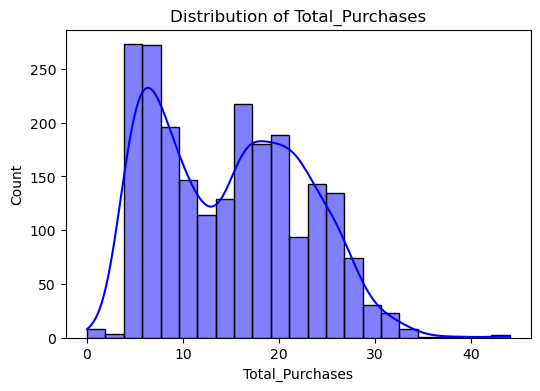

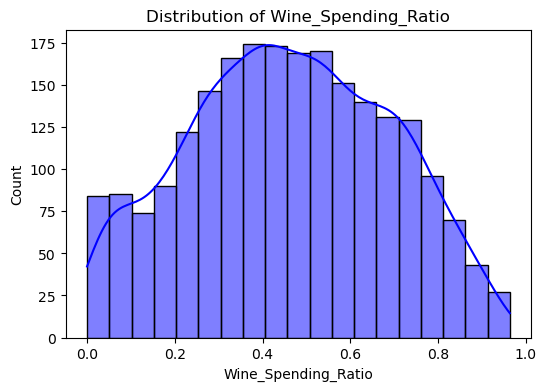

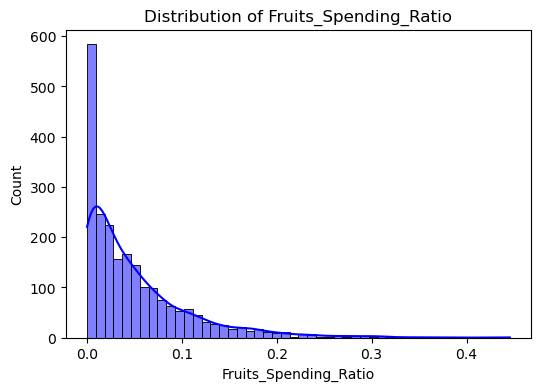

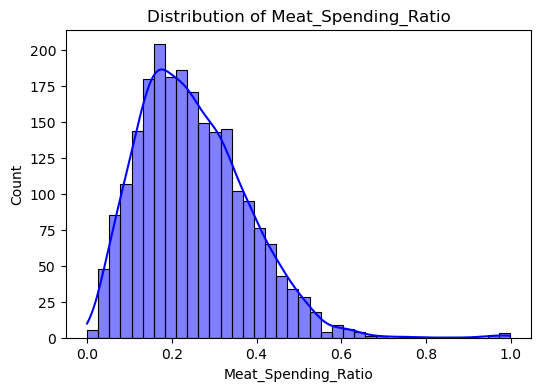

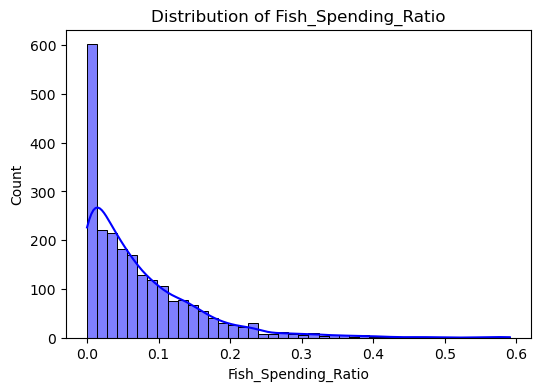

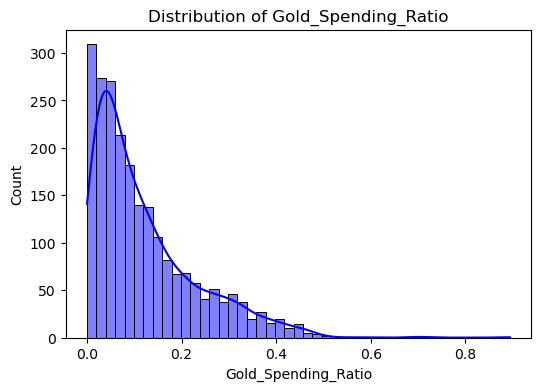

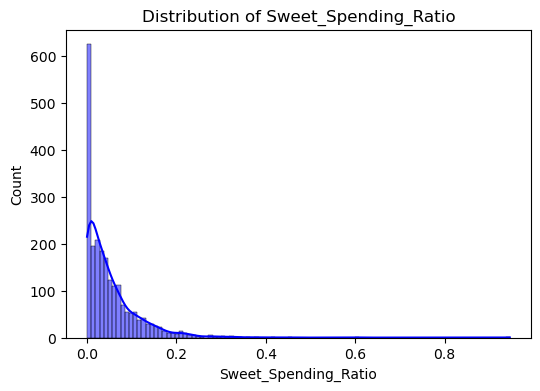

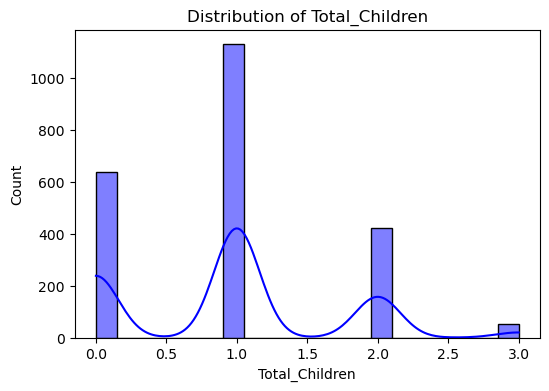

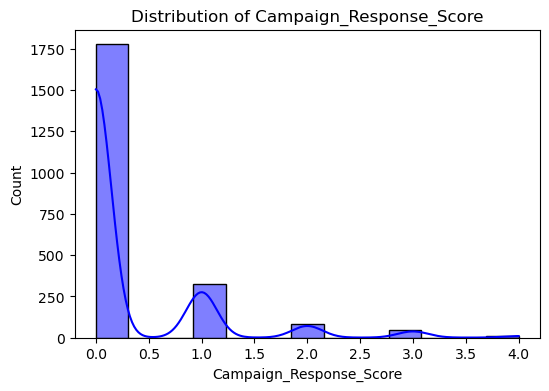

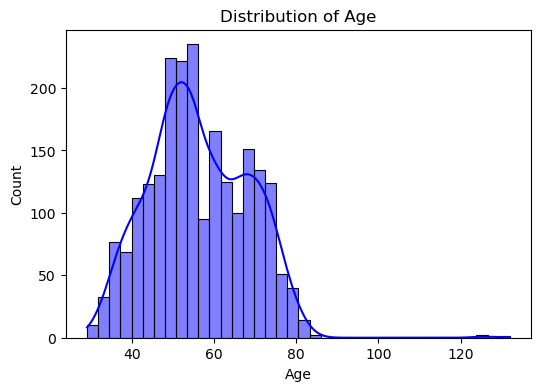

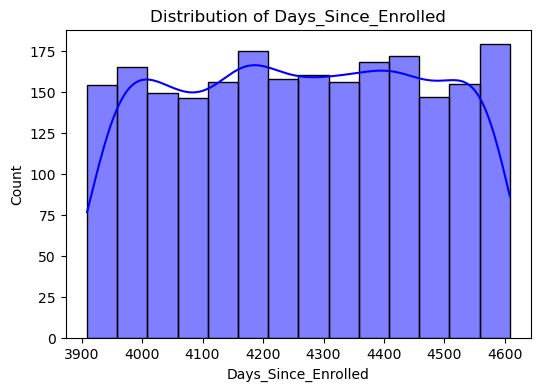

In [234]:
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f"Distribution of {col}")
    plt.show()

## 6. Scaling

In [235]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[numeric_cols])

# K-Means Clustering

In [237]:
range_n_clusters = range(2, 20)
silhouette_scores = {}
inertia_values = {}

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(df_scaled)
    sil_score = silhouette_score(df_scaled, labels)
    inertia = kmeans.inertia_
    
    silhouette_scores[n_clusters] = sil_score
    inertia_values[n_clusters] = inertia
    
    print(f"Clusters: {n_clusters}, Silhouette Score: {sil_score:.4f}, Inertia: {inertia:.4f}")

Clusters: 2, Silhouette Score: 0.2125, Inertia: 62848.4040
Clusters: 3, Silhouette Score: 0.1472, Inertia: 57217.5540
Clusters: 4, Silhouette Score: 0.1534, Inertia: 53415.3950
Clusters: 5, Silhouette Score: 0.1194, Inertia: 50313.7801
Clusters: 6, Silhouette Score: 0.1240, Inertia: 48165.2684
Clusters: 7, Silhouette Score: 0.0937, Inertia: 47062.6497
Clusters: 8, Silhouette Score: 0.1177, Inertia: 45494.6391
Clusters: 9, Silhouette Score: 0.1259, Inertia: 43584.3232
Clusters: 10, Silhouette Score: 0.1208, Inertia: 42388.0796
Clusters: 11, Silhouette Score: 0.0902, Inertia: 41759.0063
Clusters: 12, Silhouette Score: 0.0969, Inertia: 40481.5722
Clusters: 13, Silhouette Score: 0.1037, Inertia: 39147.4748
Clusters: 14, Silhouette Score: 0.0900, Inertia: 38989.1072
Clusters: 15, Silhouette Score: 0.1042, Inertia: 37702.8882
Clusters: 16, Silhouette Score: 0.1003, Inertia: 37304.9919
Clusters: 17, Silhouette Score: 0.1098, Inertia: 36606.1677
Clusters: 18, Silhouette Score: 0.1047, Inertia:

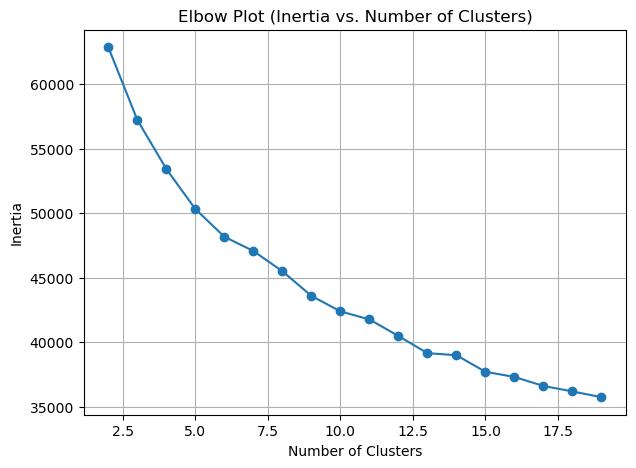

In [238]:
# Plot the Elbow Plot
plt.figure(figsize=(7, 5))
plt.plot(list(inertia_values.keys()), list(inertia_values.values()), marker='o')
plt.title("Elbow Plot (Inertia vs. Number of Clusters)")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

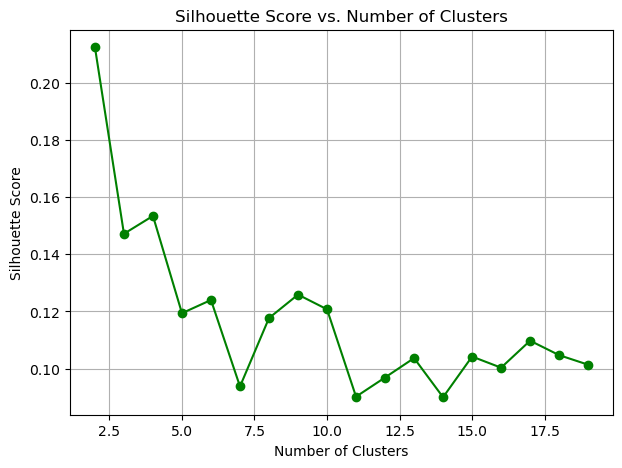

In [239]:
# Plot the Silhouette Score
plt.figure(figsize=(7, 5))
plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o', color='green')
plt.title("Silhouette Score vs. Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [241]:
# Find the best number of clusters by silhouette score
optimal_clusters = max(silhouette_scores, key=silhouette_scores.get)
print(f"\nOptimal number of clusters (based on silhouette): {optimal_clusters}")


Optimal number of clusters (based on silhouette): 2


# Final Clustering

In [242]:
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
final_labels = kmeans_optimal.fit_predict(df_scaled)

# Add cluster labels to the original dataframe for analysis
df['Cluster'] = final_labels

# PCA for 2D Visualization
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(df_scaled)

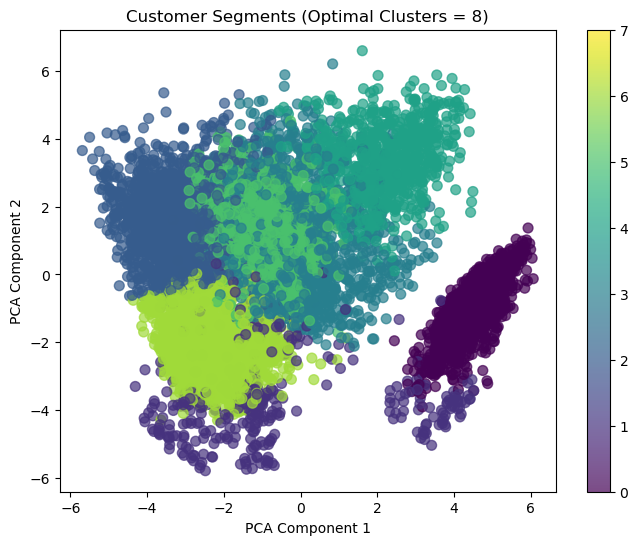

In [22]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=final_labels, cmap='viridis', s=50, alpha=0.7)
plt.title(f"Customer Segments (Optimal Clusters = {optimal_clusters})")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

# Cluster Profiling

In [243]:
print("\nCluster Centers (scaled features):")
print(kmeans_optimal.cluster_centers_)

# Mean values of each feature per cluster (unscaled)
cluster_means = df.groupby('Cluster').mean()
print("\nCluster-Wise Mean Values (unscaled data):")
print(cluster_means)

print("\n--- Pipeline Complete ---")


Cluster Centers (scaled features):
[[-0.01535086  0.77501861 -0.6946712  -0.1157326   0.0102608   0.90438087
   0.69561979  0.82470614  0.71701476  0.69637517  0.57127733 -0.1161915
   0.60961114  0.8884075   0.85185919 -0.62018216  0.04448986  0.28414254
   0.39825348  0.35058359  0.14682403 -0.0187552   0.          0.
   0.2308972   1.02274402  0.89039142  0.17813921 -0.05816686  0.20450343
  -0.08479009 -0.50147041 -0.03393174 -0.58130997  0.43127362  0.1681317
   0.11698765]
 [ 0.01079813 -0.54516519  0.48864704  0.08140886 -0.00721767 -0.63616145
  -0.4893143  -0.58011648 -0.50436399 -0.48984565 -0.40184907  0.08173167
  -0.42881392 -0.62492543 -0.59921654  0.4362498  -0.03129515 -0.19987213
  -0.28014028 -0.24660823 -0.10327926  0.01319282  0.          0.
  -0.16241818 -0.7194207  -0.62632096 -0.12530705  0.04091585 -0.14385222
   0.05964322  0.35274535  0.02386833  0.40890625 -0.30336737 -0.11826755
  -0.0822917 ]]

Cluster-Wise Mean Values (unscaled data):
                  ID